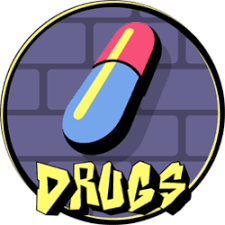

# 1. Introduction

### Company Introduction
client for this project is a pharmaceutical company.

They have a long history of making effective drugs and are the leading producer of antibiotics for bacterial infection.
Their research and development team have recently developed five types of drugs to fight against chronic throat infection.
They want to quickly release the drug in the market so that they could cure people and increase revenue for the company.
Their R&D team made a brief analysis of the chemical composition present in the drug and made a brief report stating that each drug has a different effect according to their health.
The drug which has a higher concentration of chemicals should be given to those groups of people whose health report passes some criteria as suggested by the R&D team.

# 2.Problem Statement


## The current process suffers from the following problems:

Testing phase takes a lot of time and it's done manually because they need to carefully examine each person for the side effects.
Most of the crucial time is being wasted in checking each person’s health report and dispensing specific drugs according to the health metric as suggested by the R&D team.
This process is time-consuming and wastage of resources.

The company has hired you as data science consultants. They want to automate the process of assigning the drug according to their health report.

# 3.Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns                                               # Importin seaborm library for interactive visualization
import matplotlib.pyplot as plt                                    # Importing pyplot interface using matplotlib
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

# 4.Load and Audit the Data

In [2]:
data_train = pd.read_csv("C:/DS/Term Projects/Drug prediction/drug_train.csv")
data_test = pd.read_csv("C:/DS/Term Projects/Drug prediction/drug_test.csv")

In [3]:
data_train.head()

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,79,32,F,LOW,NORMAL,10.840,drugX
1,197,52,M,NORMAL,HIGH,9.894,drugX
2,38,39,F,NORMAL,NORMAL,9.709,drugX
3,24,33,F,LOW,HIGH,33.486,DrugY
4,122,34,M,NORMAL,HIGH,22.456,DrugY


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           160 non-null    int64  
 1   Age          160 non-null    int64  
 2   Sex          160 non-null    object 
 3   BP           160 non-null    object 
 4   Cholesterol  160 non-null    object 
 5   Na_to_K      160 non-null    float64
 6   Drug         160 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.9+ KB


In [5]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           40 non-null     int64  
 1   Age          40 non-null     int64  
 2   Sex          40 non-null     object 
 3   BP           40 non-null     object 
 4   Cholesterol  40 non-null     object 
 5   Na_to_K      40 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.0+ KB


In [6]:
data_train.isnull().sum()

Id             0
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
data_train.drop_duplicates()

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,79,32,F,LOW,NORMAL,10.840,drugX
1,197,52,M,NORMAL,HIGH,9.894,drugX
2,38,39,F,NORMAL,NORMAL,9.709,drugX
3,24,33,F,LOW,HIGH,33.486,DrugY
4,122,34,M,NORMAL,HIGH,22.456,DrugY
...,...,...,...,...,...,...,...
155,106,22,M,NORMAL,HIGH,11.953,drugX
156,14,50,F,NORMAL,HIGH,12.703,drugX
157,92,29,F,HIGH,HIGH,29.450,DrugY
158,179,67,F,NORMAL,HIGH,15.891,DrugY


In [8]:
data_train.nunique()

Id             160
Age             53
Sex              2
BP               3
Cholesterol      2
Na_to_K        159
Drug             5
dtype: int64

In [9]:
data_train.describe(include= 'float64')

,Na_to_K
count,160.000000
mean,16.194988
std,7.254689
min,6.269000
25%,10.445250
50%,14.076500
75%,19.480750
max,38.247000


In [10]:
data_train.skew()

Id         0.011162
Age       -0.008815
Na_to_K    1.065324
dtype: float64

### 5. 1) Uni-Variate Analysis

In [11]:
data_train['Sex'].value_counts()

M    83
F    77
Name: Sex, dtype: int64

In [12]:
data_train['Drug'].value_counts()

DrugY    76
drugX    43
drugA    17
drugB    13
drugC    11
Name: Drug, dtype: int64

<AxesSubplot:xlabel='Drug', ylabel='count'>

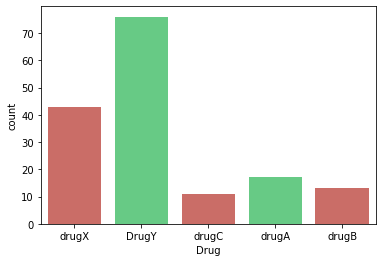

In [13]:
sns.countplot(x = 'Drug', data = data_train, palette = ['#DB5E56','#56DB7F'])

<AxesSubplot:ylabel='Sex'>

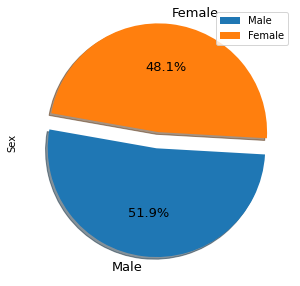

In [14]:
data_train['Sex'].value_counts().plot(kind='pie', labels=['Male', 'Female'],
                                                     explode = (0.05, 0.1), autopct='%3.1f%%', shadow=True, startangle=170, 
                                                     legend=True, figsize=(5,5), fontsize=13)

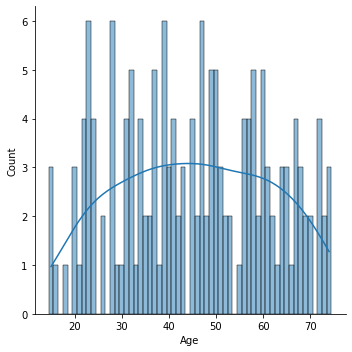

In [15]:
sns.displot(data_train['Age'], discrete = True, kde = True)


### 5. 2) Bi-Variate Analysis

<AxesSubplot:>

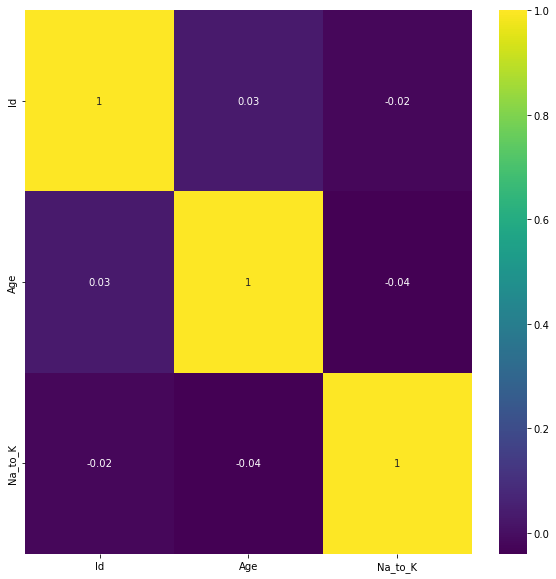

In [16]:
corr_mat = data_train.corr().round(2)
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, annot=True, cmap='viridis')

# Observation

1. **Sodium and potassium ratio(Na_to_k)** and **Prescribed Drug** has correlation 
2. Other than these there is no multicollinearity present in the dataset


###    Change Cat (Y) column Drug to Numerical

In [17]:
warnings.filterwarnings('ignore')

for i in range(0,len(data_train)):
    if data_train.Drug[i] == "DrugY":
        data_train.Drug[i] = 4
    elif data_train.Drug[i] == "drugX":
        data_train.Drug[i] = 3
    elif data_train.Drug[i] == "drugA":
        data_train.Drug[i] = 2
    elif data_train.Drug[i] == "drugC":
        data_train.Drug[i] = 1
    else:
        data_train.Drug[i] = 0

In [18]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           160 non-null    int64  
 1   Age          160 non-null    int64  
 2   Sex          160 non-null    object 
 3   BP           160 non-null    object 
 4   Cholesterol  160 non-null    object 
 5   Na_to_K      160 non-null    float64
 6   Drug         160 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.9+ KB


In [19]:
data_types_dict = {"Drug": int}

data_train = data_train.astype(data_types_dict)

### 6.Split the data

In [20]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [21]:
x = data_train.iloc[:,1:6]
y = data_train['Drug']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 123)

In [23]:
x_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
152,57,M,LOW,NORMAL,19.128
117,52,M,LOW,NORMAL,32.922
5,56,F,LOW,HIGH,11.567
16,49,M,HIGH,NORMAL,6.269
45,59,M,HIGH,HIGH,13.935


In [24]:
y_train.head()

152    4
117    4
5      1
16     2
45     0
Name: Drug, dtype: int32

In [25]:
#categorial colums 
x_train_cat = x_train.select_dtypes(include =["object"])
x_test_cat = x_test.select_dtypes(include=["object"])

In [26]:
# numeric Columns 
x_train_con = x_train.select_dtypes(exclude =["object"])
x_test_con = x_test.select_dtypes(exclude=["object"])

### 7. Using One Hot Encoding

In [27]:
#One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first', sparse = False)
enc.fit(x_train_cat)
enc.fit(x_train_cat)

enc.categories_

[array(['F', 'M'], dtype=object),
 array(['HIGH', 'LOW', 'NORMAL'], dtype=object),
 array(['HIGH', 'NORMAL'], dtype=object)]

In [28]:
#transform train and test data using OHE
X_train_OHE = pd.DataFrame(enc.transform(x_train_cat), columns = enc.get_feature_names_out(x_train_cat.columns), index = x_train_cat.index)
X_test_OHE = pd.DataFrame(enc.transform(x_test_cat), columns = enc.get_feature_names_out(x_train_cat.columns), index = x_test_cat.index)


In [29]:
X_train_OHE

,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
152,1.0,1.0,0.0,1.0
117,1.0,1.0,0.0,1.0
5,0.0,1.0,0.0,0.0
16,1.0,0.0,0.0,1.0
45,1.0,0.0,0.0,0.0
...,...,...,...,...
17,1.0,0.0,0.0,1.0
98,0.0,0.0,0.0,1.0
66,0.0,1.0,0.0,0.0
126,1.0,1.0,0.0,0.0


### 8. Combine OHE columns

In [30]:
X_train_comb = pd.concat([X_train_OHE,x_train_con], axis=1)
X_test_comb = pd.concat([X_test_OHE,x_test_con], axis=1)

In [31]:
X_train_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 152 to 109
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sex_M               112 non-null    float64
 1   BP_LOW              112 non-null    float64
 2   BP_NORMAL           112 non-null    float64
 3   Cholesterol_NORMAL  112 non-null    float64
 4   Age                 112 non-null    int64  
 5   Na_to_K             112 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 6.1 KB


---
# **9. Model Development & Evaluation**
---

- In this section we will **develop a decision Tree model** and **Random Forest** 

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **Precision**, **Recall** and **Accuracy** scores.

- We will do **hyperparameter tuning** and see if the scores improves. 
 

### 9. a.  Here we will develop DecissionTree classifier using default setting.

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
dtree = DecisionTreeClassifier(criterion = 'gini') 
dtree.fit(X_train_comb,y_train)
peds_dt_train = dtree.predict(X_train_comb)
peds_dt_test = dtree.predict(X_test_comb)

In [34]:
peds_dt_train

array([4, 4, 1, 2, 0, 4, 3, 3, 4, 3, 1, 0, 3, 2, 4, 3, 4, 4, 3, 3, 4, 3,
       0, 4, 4, 4, 3, 4, 3, 4, 2, 4, 1, 0, 4, 3, 1, 3, 4, 4, 4, 4, 2, 2,
       3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 0, 3, 3, 4, 4, 4,
       3, 4, 4, 1, 0, 0, 2, 4, 3, 2, 4, 3, 4, 2, 4, 3, 4, 3, 3, 3, 4, 3,
       4, 3, 4, 2, 3, 4, 4, 4, 3, 3, 3, 2, 4, 4, 3, 4, 4, 1, 2, 4, 4, 1,
       4, 2])

In [35]:
def model_evaluation(actual, predicted):
    
    acc_score = accuracy_score(actual,predicted)
    cm_matrix = confusion_matrix(actual, predicted)
    clas_rep = classification_report(actual, predicted)
    
    print("Accuracy Score : ", round(acc_score,2))
    print("Confusion Matrix : ")
    print(cm_matrix)
    
    print(clas_rep)     

In [36]:
model_evaluation(y_train,peds_dt_train)

Accuracy Score :  1.0
Confusion Matrix : 
[[ 7  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0 32  0]
 [ 0  0  0  0 54]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        54

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



In [37]:
model_evaluation(y_test, peds_dt_test)

Accuracy Score :  0.98
Confusion Matrix : 
[[ 5  0  1  0  0]
 [ 0  4  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 22]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00         4
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        22

    accuracy                           0.98        48
   macro avg       0.97      0.97      0.96        48
weighted avg       0.98      0.98      0.98        48



### 9) b. Here we will develop Random forest classifier using default setting.

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier(verbose = 1, random_state = 123) 
rf.fit(X_train_comb,y_train)
peds_rf_train = rf.predict(X_train_comb)
peds_rf_test = rf.predict(X_test_comb)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


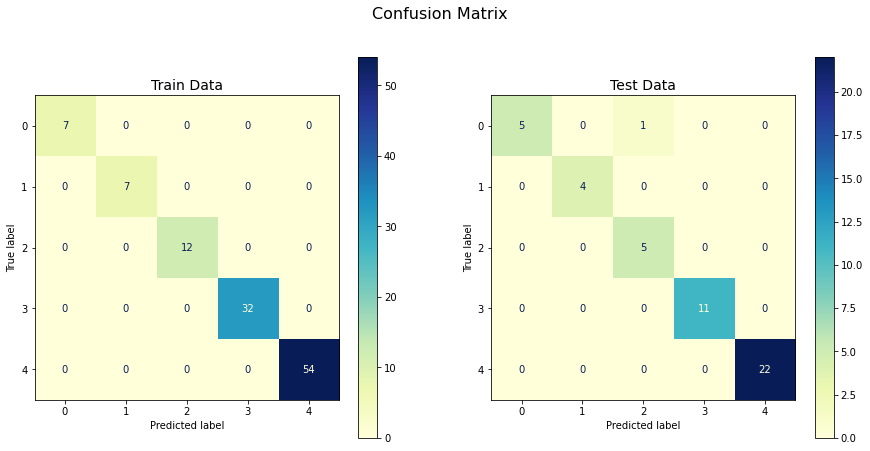

In [40]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=rf, X=X_train_comb, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=rf, X=X_test_comb, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [41]:
model_evaluation(y_train, peds_rf_train)

Accuracy Score :  1.0
Confusion Matrix : 
[[ 7  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0 32  0]
 [ 0  0  0  0 54]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        54

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



In [42]:
model_evaluation(y_test, peds_rf_test)

Accuracy Score :  0.98
Confusion Matrix : 
[[ 5  0  1  0  0]
 [ 0  4  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 22]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00         4
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        22

    accuracy                           0.98        48
   macro avg       0.97      0.97      0.96        48
weighted avg       0.98      0.98      0.98        48



### 10. Hyperparameter Optimized Model Development & Evaluation

In [43]:
param_dist = {"max_depth": range(2,5),
              "min_samples_split" : range(2,15),
              "n_estimators": [100, 200, 300],
              "criterion":['gini', 'entropy']}

In [44]:
random_search = RandomizedSearchCV(estimator = rf, 
                                   param_distributions=param_dist,
                                   n_iter=50)

In [45]:
random_search.fit(X_train_comb,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomizedSearchCV(estimator=RandomForestClassifier(random_state=123,
                                                    verbose=1),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 5),
                                        'min_samples_split': range(2, 15),
                                        'n_estimators': [100, 200, 300]})

In [46]:
peds_rcv_train = random_search.predict(X_train_comb)
peds_rcv_test = random_search.predict(X_test_comb)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [47]:
model_evaluation(y_train, peds_rcv_train)

Accuracy Score :  1.0
Confusion Matrix : 
[[ 7  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0 32  0]
 [ 0  0  0  0 54]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        54

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



In [48]:
model_evaluation(y_test, peds_rcv_test)

Accuracy Score :  0.98
Confusion Matrix : 
[[ 5  0  1  0  0]
 [ 0  4  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 22]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00         4
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        22

    accuracy                           0.98        48
   macro avg       0.97      0.97      0.96        48
weighted avg       0.98      0.98      0.98        48



### 11. Implementing the best model on the Test data
- Although we have observed no diffrence after **Hyperparameter Tuning**
- We will be using the **RSCV** model to predict teh test data 

In [49]:
data_test1 = data_test.copy()

In [50]:
data_test1 = data_test1.drop(['Id'], axis = 1)

In [51]:
test_cat = data_test1.select_dtypes(include=['object'])
test_cont = data_test1.select_dtypes(exclude=['object'])

In [52]:
test_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      40 non-null     int64  
 1   Na_to_K  40 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 768.0 bytes


In [53]:
test_OHE = pd.DataFrame(enc.transform(test_cat), columns = enc.get_feature_names_out(test_cat.columns), index = test_cat.index)

In [54]:
test_comb = pd.concat([test_OHE,test_cont], axis=1)

In [55]:
test_comb

,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Age,Na_to_K
0,1.0,1.0,0.0,1.0,36,11.424
1,0.0,0.0,0.0,1.0,16,15.516
2,0.0,0.0,1.0,1.0,18,8.750
3,0.0,1.0,0.0,0.0,59,10.444
4,1.0,1.0,0.0,1.0,47,33.542
5,1.0,0.0,0.0,0.0,51,18.295
6,0.0,0.0,0.0,1.0,18,24.276
7,0.0,0.0,1.0,0.0,28,12.879
8,1.0,0.0,0.0,1.0,42,12.766
9,0.0,0.0,1.0,1.0,66,8.107


In [56]:
pred_drug = random_search.predict(test_comb)
df = pd.DataFrame(data = pred_drug)
df.columns = ['Drug']

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [57]:
submission_df = pd.DataFrame(data = data_test, columns = ["Id"])


In [58]:
submission_df["Drug"] = df["Drug"]


In [59]:
submission_df.head()


,Id,Drug
0,95,3
1,15,4
2,30,3
3,158,1
4,128,4


In [60]:
submission_df.to_csv("Submission.csv", index = False, header = False)